In [1]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [5]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [7]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\vicen\\OneDrive\\Documentos\\dataset_flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\vicen\OneDrive\Documentos\dataset_flores\
C:\Users\vicen\OneDrive\Documentos\dataset_flores\Begonia 1
C:\Users\vicen\OneDrive\Documentos\dataset_flores\CoronaDeCristo 10470
C:\Users\vicen\OneDrive\Documentos\dataset_flores\NocheBuena 10218
C:\Users\vicen\OneDrive\Documentos\dataset_flores\Orquidea 10661
C:\Users\vicen\OneDrive\Documentos\dataset_flores\Vinca 10540
Directorios leidos: 5
Imagenes en cada directorio [10471, 10218, 10661, 10540, 9723]
suma Total de imagenes en subdirs: 51613


# Creamos las etiquetas

In [8]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  51613


In [9]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Begonia
1 CoronaDeCristo
2 NocheBuena
3 Orquidea
4 Vinca


In [10]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [11]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (41290, 50, 50, 3) (41290,)
Testing data shape :  (10323, 50, 50, 3) (10323,)


Text(0.5, 1.0, 'Ground Truth : 1')

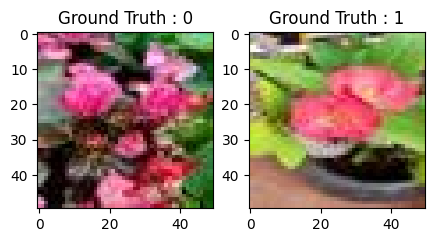

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

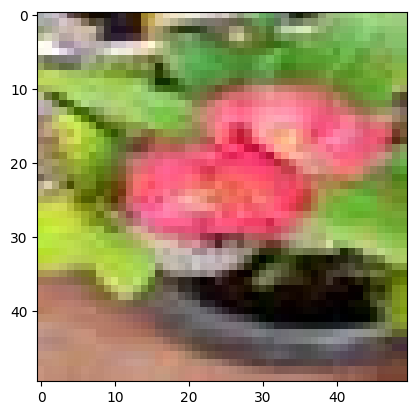

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [14]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [38]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

ValueError: Found input variables with inconsistent numbers of samples: [33032, 41290]

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

# Creamos el modelo de CNN

In [39]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [40]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(Activation('relu'))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(Activation('relu'))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [41]:
sport_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 25, 25, 64)        0         
                                                      

In [42]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [43]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
517/517 [==============================] - 90s 172ms/step - loss: 1.6185 - accuracy: 0.2186 - val_loss: 1.6025 - val_accuracy: 0.2786
Epoch 2/20
517/517 [==============================] - 81s 157ms/step - loss: 1.5852 - accuracy: 0.2578 - val_loss: 1.5845 - val_accuracy: 0.3959
Epoch 3/20
517/517 [==============================] - 82s 159ms/step - loss: 1.5430 - accuracy: 0.3039 - val_loss: 1.5405 - val_accuracy: 0.5119
Epoch 4/20
517/517 [==============================] - 82s 159ms/step - loss: 1.4611 - accuracy: 0.3679 - val_loss: 1.4514 - val_accuracy: 0.6236
Epoch 5/20
517/517 [==============================] - 81s 158ms/step - loss: 1.3179 - accuracy: 0.4537 - val_loss: 1.2993 - val_accuracy: 0.6586
Epoch 6/20
517/517 [==============================] - 81s 156ms/step - loss: 1.1428 - accuracy: 0.5411 - val_loss: 1.1228 - val_accuracy: 0.6986
Epoch 7/20
517/517 [==============================] - 82s 159ms/step - loss: 1.0110 - accuracy: 0.5993 - val_loss: 0.9832 - val_ac

In [44]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:\\Users\\vicen\\OneDrive\\Documentos\\modelo_flores_final_f.h5py")

INFO:tensorflow:Assets written to: C:\Users\vicen\OneDrive\Documentos\modelo_flores_final_f.h5py\assets


INFO:tensorflow:Assets written to: C:\Users\vicen\OneDrive\Documentos\modelo_flores_final_f.h5py\assets


# Evaluamos la red

In [45]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

323/323 [==============================] - 8s 26ms/step - loss: 0.1620 - accuracy: 0.9754


In [46]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1620001643896103
Test accuracy: 0.9753947257995605


In [47]:
sport_train.history

{'loss': [1.618476390838623,
  1.5852357149124146,
  1.5430278778076172,
  1.4610891342163086,
  1.317887306213379,
  1.1427983045578003,
  1.010998010635376,
  0.9050737619400024,
  0.8231882452964783,
  0.747334897518158,
  0.6813099980354309,
  0.6131828427314758,
  0.5619280934333801,
  0.5066301226615906,
  0.46253833174705505,
  0.4203910529613495,
  0.3811950087547302,
  0.3397302031517029,
  0.3032902181148529,
  0.2717510759830475],
 'accuracy': [0.21860620379447937,
  0.2577500641345978,
  0.30394768714904785,
  0.36791595816612244,
  0.4536510109901428,
  0.541141927242279,
  0.5992976427078247,
  0.6493703126907349,
  0.6819145083427429,
  0.7176374197006226,
  0.7421894073486328,
  0.7668624520301819,
  0.7885081171989441,
  0.8116977214813232,
  0.8289234638214111,
  0.8502663969993591,
  0.8652216196060181,
  0.8841426372528076,
  0.8975236415863037,
  0.9121155142784119],
 'val_loss': [1.6025290489196777,
  1.5844699144363403,
  1.5404695272445679,
  1.4514268636703491,

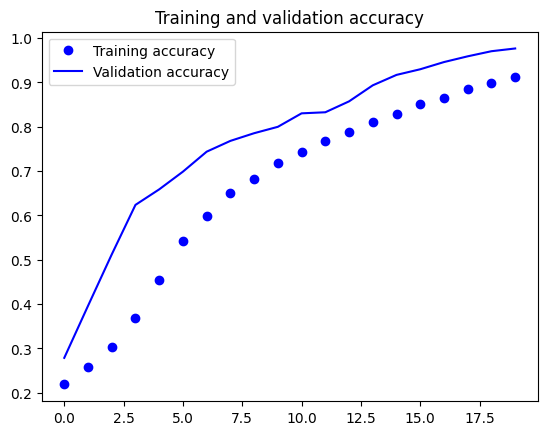

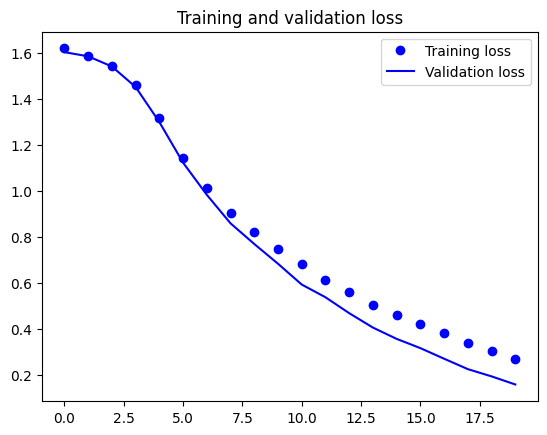

In [48]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
predicted_classes2 = sport_model.predict(test_X)

323/323 [==============================] - 8s 24ms/step


In [50]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [51]:
predicted_classes.shape, test_Y.shape

((10323,), (10323,))

# Aprendamos de los errores: Qué mejorar

Found 10069 correct labels


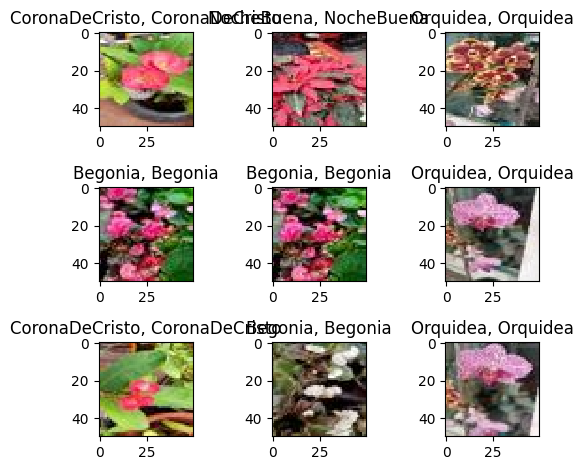

In [52]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 254 incorrect labels


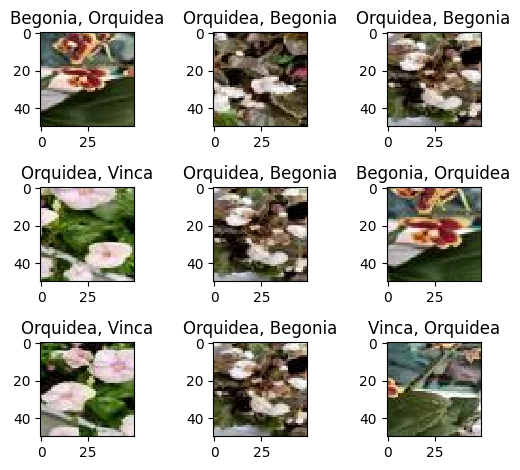

In [53]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [54]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.95      0.96      2130
     Class 1       1.00      0.99      0.99      2050
     Class 2       0.99      1.00      0.99      2143
     Class 3       0.94      0.96      0.95      2063
     Class 4       0.98      0.98      0.98      1937

    accuracy                           0.98     10323
   macro avg       0.98      0.98      0.98     10323
weighted avg       0.98      0.98      0.98     10323



In [109]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Especifica la ruta de la imagen
filepath = 'C:\\Users\\vicen\\OneDrive\\Documentos\\img\\v2.png'

# Lee la imagen
image = plt.imread(filepath, 0)

# Redimensiona la imagen
image_resized = resize(image, (50, 50), anti_aliasing=True, clip=False, preserve_range=True)

# Convierte la imagen redimensionada a un arreglo numpy
X = np.array([image_resized])

# Realiza la predicción usando el modelo (asegúrate de haber definido 'sport_model' previamente)
predicted_classes = sport_model.predict(X)

# Obtiene la clase predicha para la imagen
predicted_class_index = np.argmax(predicted_classes)

# Imprime la clase predicha
print(f'La imagen {filepath} pertenece a la clase: {deportes[predicted_class_index]}')

1/1 [==============================] - 0s 54ms/step
La imagen C:\Users\vicen\OneDrive\Documentos\img\v2.png pertenece a la clase: Orquidea
